# 3.3 Задача о лишних транзакциях

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("txs.csv",header=None)
df.columns = ['timestamp','id']
df['timestamp'] =  pd.to_datetime(df.timestamp)
df['week'] = df.timestamp.dt.to_period('W-MON')


In [6]:
groupped = df.groupby(['week','id']).timestamp.count()
groupped = groupped.reset_index().pivot(index='week', columns='id', values='timestamp')[1:-1]

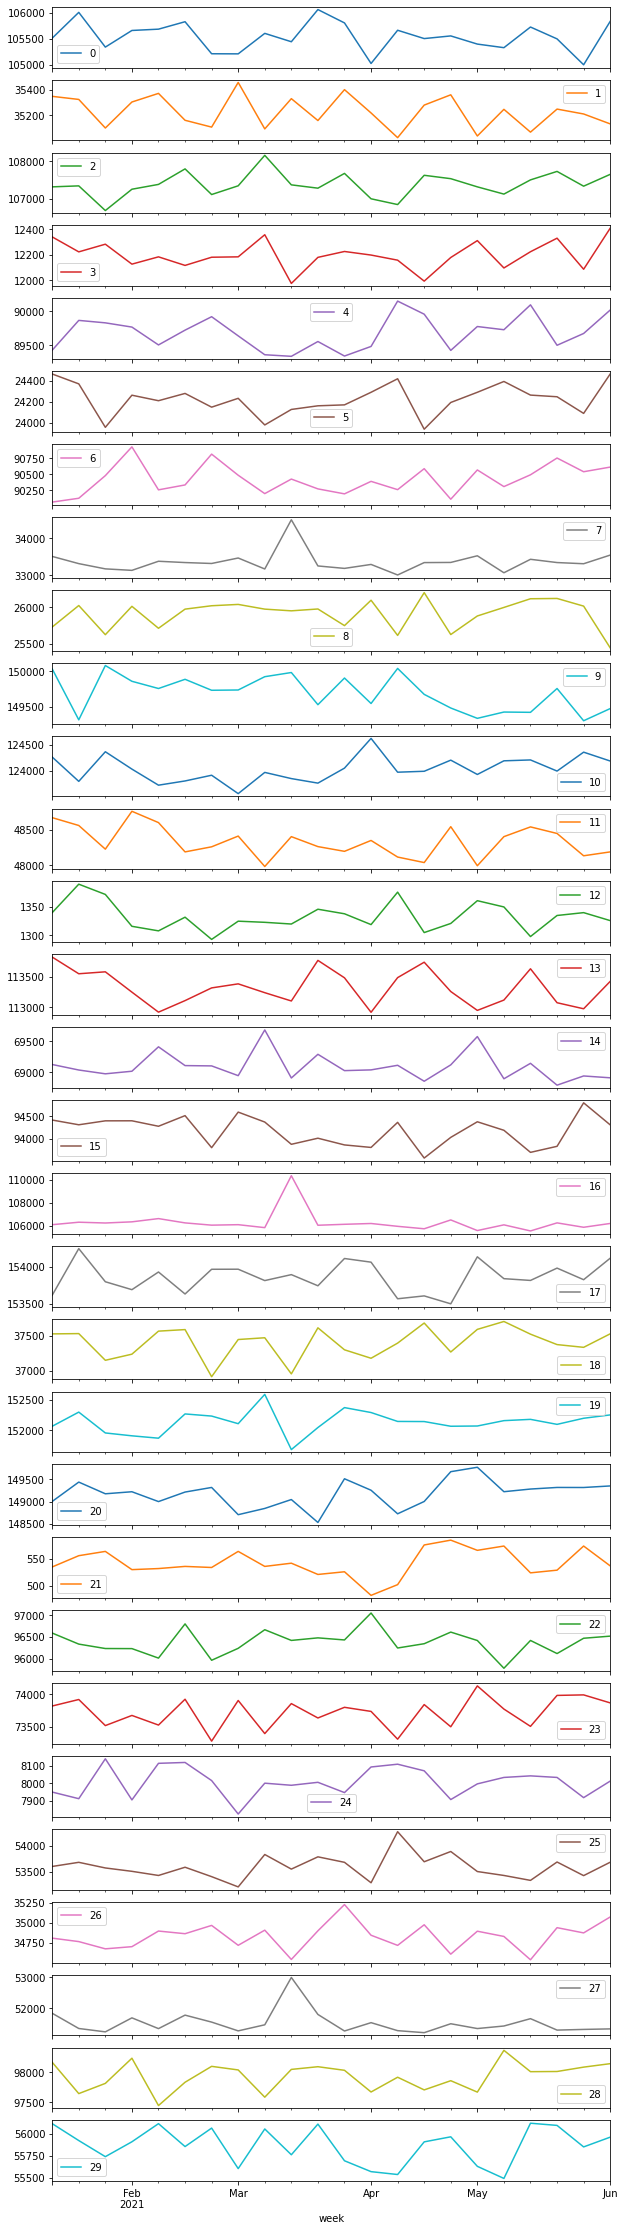

In [10]:
_=groupped.plot(subplots=True,figsize=(10,40))

Видны сильные отклонения на графиках 3,7,16,27,21 с марта по апрель

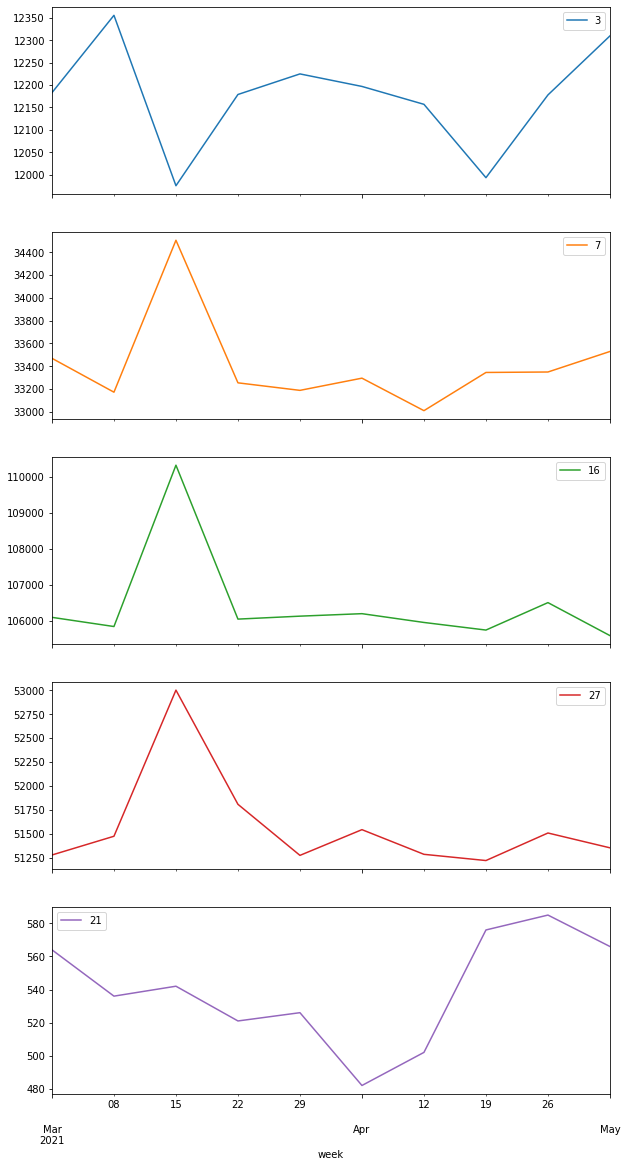

In [14]:
selected = groupped[[3,7,16,27,21]].loc['2021-03':'2021-04']
_= selected.plot(subplots=True,figsize=(10,20))

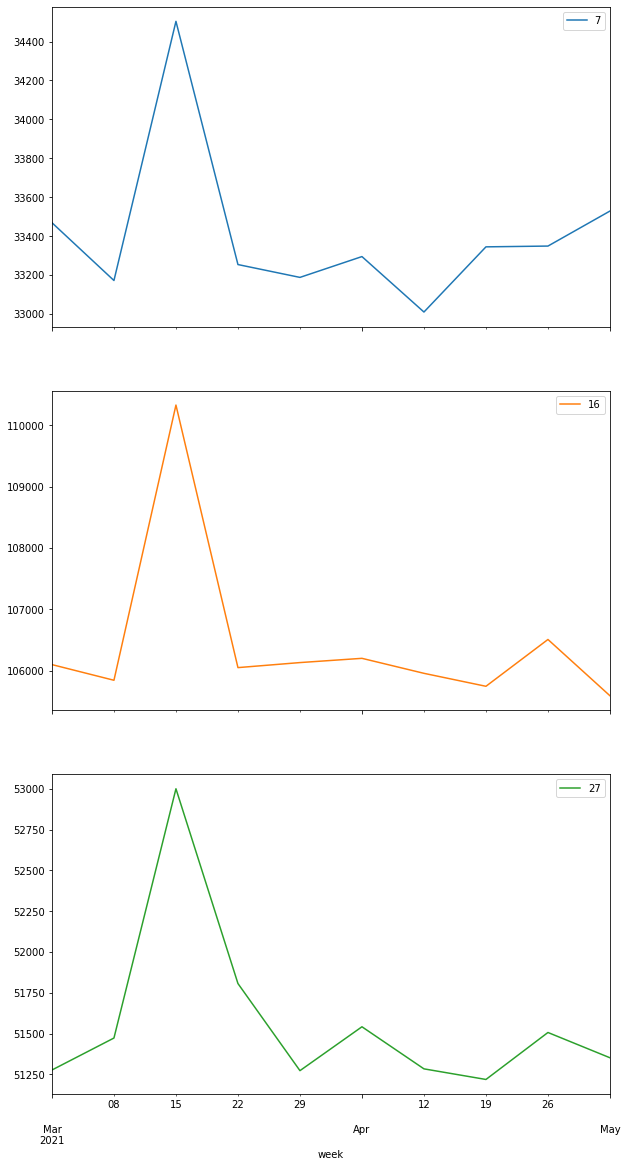

In [16]:
selected = groupped[[7,16,27]].loc['2021-03':'2021-04']
_= selected.plot(subplots=True,figsize=(10,20))

In [90]:
groupped.describe()[[7,16,27]]

id,7,16,27
count,22.000000,22.000000,22.000000
mean,33364.272727,106293.227273,51529.227273
std,292.053841,938.757838,381.746355
min,33010.000000,105563.000000,51219.000000
25%,33204.500000,105984.250000,51307.500000
50%,33333.000000,106119.500000,51394.000000
75%,33420.750000,106257.750000,51643.250000
max,34504.000000,110328.000000,53001.000000


In [19]:
selected_ids = df[df.id.isin([7,16,27])]

In [20]:
selected_ids['hour'] = selected_ids.timestamp.dt.to_period('H')
selected_ids['day'] = selected_ids.timestamp.dt.to_period('D')
selected_ids['month/week'] = selected_ids.timestamp.dt.to_period('W-MON')
g_selected_ids = selected_ids.groupby(['id','hour']).count().reset_index().pivot(index='hour', columns='id', values='timestamp')

<ipython-input-20-53809536cc59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_ids['hour'] = selected_ids.timestamp.dt.to_period('H')
<ipython-input-20-53809536cc59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_ids['day'] = selected_ids.timestamp.dt.to_period('D')
<ipython-input-20-53809536cc59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

array([<AxesSubplot:xlabel='hour'>, <AxesSubplot:xlabel='hour'>,
       <AxesSubplot:xlabel='hour'>], dtype=object)

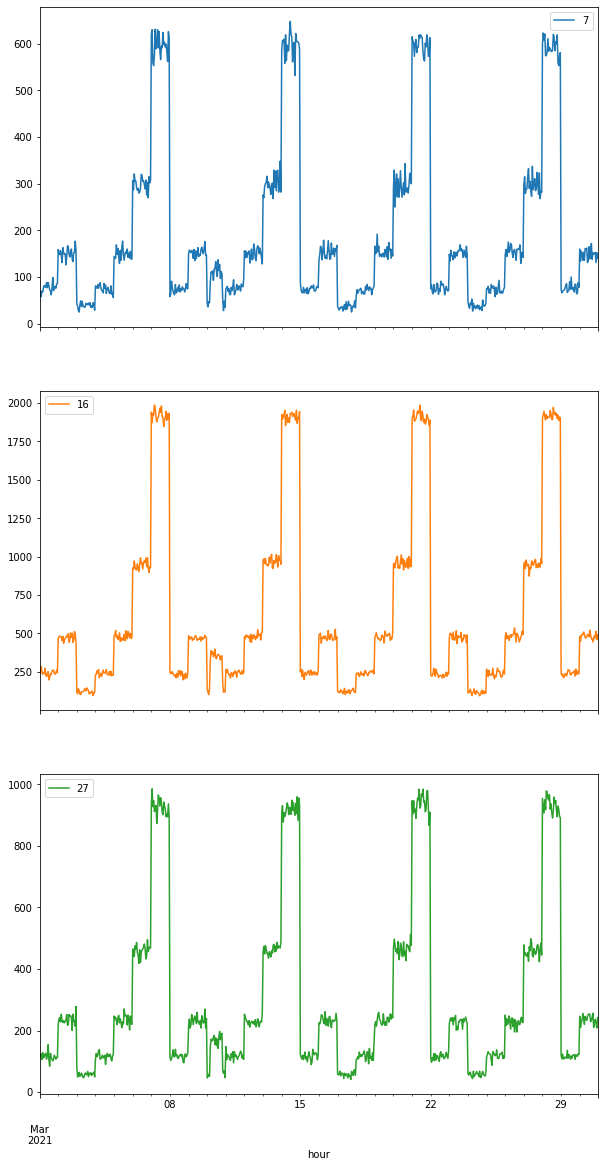

In [22]:
g_selected_ids = selected_ids.groupby(['id','hour']).count().reset_index().pivot(index='hour', columns='id', values='timestamp')
g_selected_ids.loc['2021-03-1':'2021-03-30'].plot(subplots=True,figsize=(10,20))


Видна цикличность, на каждом графике есть отклонение между 2021-03-10 и 2021-03-11

array([<AxesSubplot:xlabel='hour'>, <AxesSubplot:xlabel='hour'>,
       <AxesSubplot:xlabel='hour'>], dtype=object)

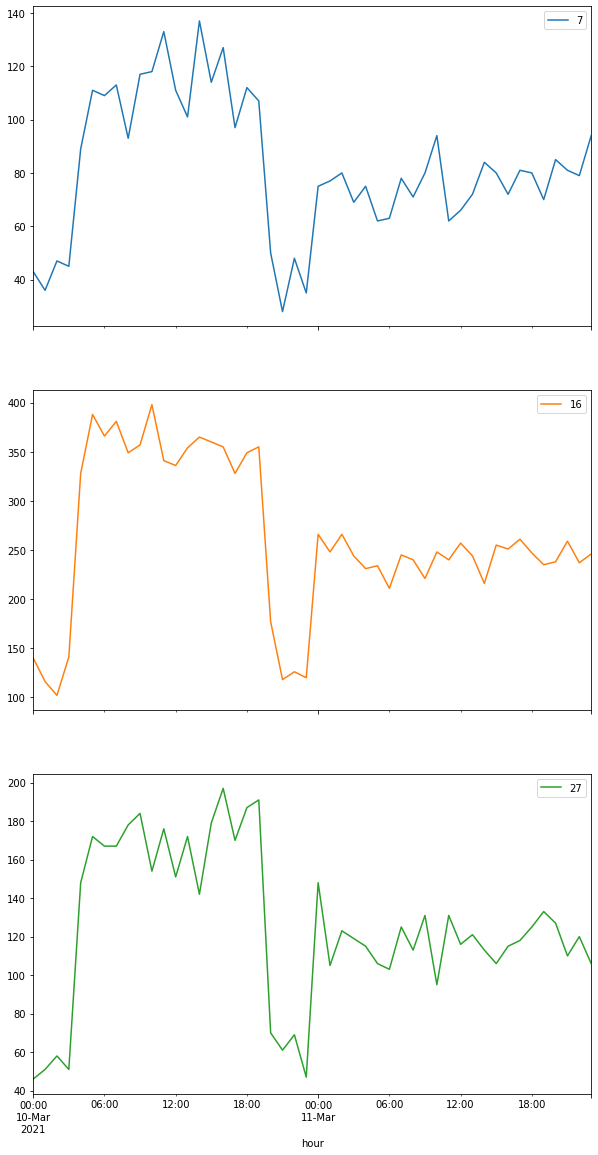

In [24]:
g_selected_ids.loc['2021-03-10':'2021-03-11'].plot(subplots=True,figsize=(10,20))


Обычный день

array([<AxesSubplot:xlabel='hour'>, <AxesSubplot:xlabel='hour'>,
       <AxesSubplot:xlabel='hour'>], dtype=object)

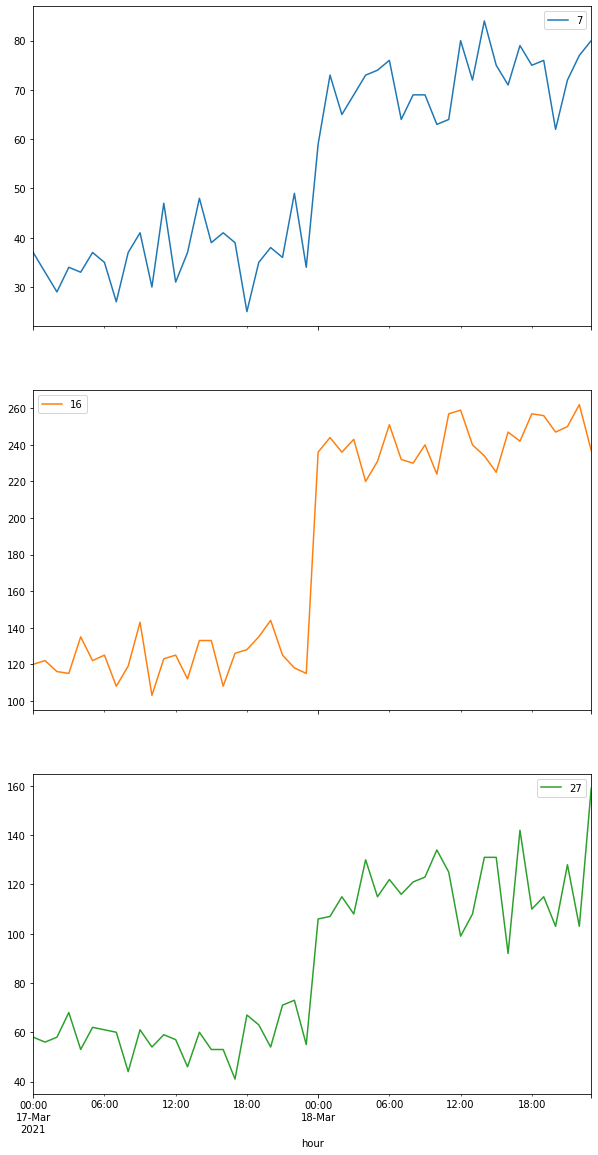

In [21]:
g_selected_ids = selected_ids.groupby(['id','hour']).count().reset_index().pivot(index='hour', columns='id', values='timestamp')
g_selected_ids.loc['2021-03-17':'2021-03-18'].plot(subplots=True,figsize=(10,20))

## Ответ


Лишнии транзакции были у клиентов 7,16,27  
Время - в течении 10.03.21